# 패션 MNIST

In [3]:
from tensorflow import keras

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
import matplotlib.pyplot as plt

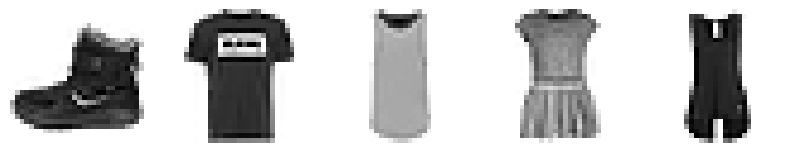

In [8]:
_, axs = plt.subplots(1,5,figsize=(10,10))
for i in range(5):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].axis('off')

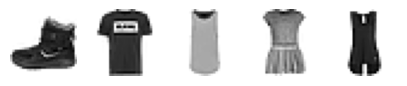

In [9]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.axis('off')

In [10]:
import numpy as np

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

In [15]:
sgdc = SGDClassifier(loss='log', random_state=0)
x_train_scaled = x_train / 255.0
x_train_scaled = x_train_scaled.reshape(-1,28*28)
scores = cross_validate(sgdc, x_train_scaled, y_train, n_jobs=-1)

In [16]:
scores['test_score'].mean()

0.8434166666666666

# 인공신경망 만들기

In [17]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(x_train_scaled, y_train, random_state=0)

In [18]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [19]:
model = keras.Sequential(dense)

In [20]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [21]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6157 - accuracy: 0.7893
Epoch 2/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4765 - accuracy: 0.8376
Epoch 3/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4527 - accuracy: 0.8477
Epoch 4/5
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4387 - accuracy: 0.8514
Epoch 5/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4292 - accuracy: 0.8547


In [22]:
model.evaluate(val_scaled, val_target)

469/469 [==============================] - 1s 1ms/step - loss: 0.4671 - accuracy: 0.8371


[0.46713563799858093, 0.8371333479881287]

In [23]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [24]:
target = [0]*100 + [1]*100 + [2]*100
target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [25]:
x_train, x_test, y_train, y_test = train_test_split(fruits, target)

In [26]:
x_train_scaled = x_train / 255.0

In [27]:
dense = keras.layers.Dense(3,activation='softmax',input_shape=(10000,))